In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

In [4]:
# Load dataset
dataset = pd.read_csv('lstm_nox.csv')
dataset = dataset.fillna(dataset.mean())
data = dataset.values
data = data.astype('float32')

In [5]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

In [6]:
# Split data into training and testing sets
train_size = int(len(data) * 0.67)
test_size = len(data) - train_size
train, test = data[0:train_size,:], data[train_size:len(data),:]

In [7]:
# Create function to create LSTM model
def create_model():
    model = Sequential()
    model.add(LSTM(50, input_shape=(1, 1)))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [8]:
# Reshape input data to be 3-dimensional
X_train = np.reshape(train, (train.shape[0], 1, train.shape[1]))
X_test = np.reshape(test, (test.shape[0], 1, test.shape[1]))

In [9]:
# Create and fit the LSTM model
model = create_model()
model.fit(X_train, train, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
938/938 - 3s - loss: 0.0073 - 3s/epoch - 3ms/step
Epoch 2/100
938/938 - 2s - loss: 2.6229e-04 - 2s/epoch - 2ms/step
Epoch 3/100
938/938 - 1s - loss: 2.3638e-04 - 1s/epoch - 2ms/step
Epoch 4/100
938/938 - 2s - loss: 2.4755e-04 - 2s/epoch - 2ms/step
Epoch 5/100
938/938 - 1s - loss: 1.9989e-04 - 1s/epoch - 1ms/step
Epoch 6/100
938/938 - 2s - loss: 2.3001e-04 - 2s/epoch - 2ms/step
Epoch 7/100
938/938 - 1s - loss: 2.1525e-04 - 1s/epoch - 1ms/step
Epoch 8/100
938/938 - 2s - loss: 2.3991e-04 - 2s/epoch - 2ms/step
Epoch 9/100
938/938 - 1s - loss: 1.8448e-04 - 1s/epoch - 2ms/step
Epoch 10/100
938/938 - 2s - loss: 1.2907e-04 - 2s/epoch - 2ms/step
Epoch 11/100
938/938 - 1s - loss: 2.1363e-04 - 1s/epoch - 1ms/step
Epoch 12/100
938/938 - 1s - loss: 1.4654e-04 - 1s/epoch - 1ms/step
Epoch 13/100
938/938 - 2s - loss: 1.7464e-04 - 2s/epoch - 2ms/step
Epoch 14/100
938/938 - 2s - loss: 1.9585e-04 - 2s/epoch - 2ms/step
Epoch 15/100
938/938 - 2s - loss: 1.8841e-04 - 2s/epoch - 2ms/step
Epoch 16

In [10]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

15/15 [==============================] - 0s 2ms/step


In [11]:
train_predict = scaler.inverse_transform(train_predict)
train = scaler.inverse_transform(train)
test_predict = scaler.inverse_transform(test_predict)
test = scaler.inverse_transform(test)

In [12]:
from sklearn.metrics import r2_score
import math
from sklearn.metrics import mean_squared_error
train_rmse = np.sqrt(mean_squared_error(train, train_predict))
test_rmse = np.sqrt(mean_squared_error(test, test_predict))
print('R2 Score_train:', r2_score(train, train_predict))
print('R2 Score_test:', r2_score(test, test_predict))

print('Train RMSE: %.2f' % train_rmse)
print('Test RMSE: %.2f' % test_rmse)

R2 Score_train: 0.9995314008181316
R2 Score_test: 0.9996636200934743
Train RMSE: 1.46
Test RMSE: 1.34


In [13]:
df=pd.DataFrame({'Actual':train.tolist(),'Predicted from lstm':train_predict.tolist()})
df.to_excel('lstm_NOx.xlsx')
df

,Actual,Predicted from lstm
0,[56.96220397949219],[55.36336135864258]
1,[56.96220397949219],[55.36336135864258]
2,[56.96220397949219],[55.36336135864258]
3,[56.96220397949219],[55.36336135864258]
4,[56.96220397949219],[55.36336135864258]
...,...,...
933,[18.15999984741211],[16.752744674682617]
934,[18.6200008392334],[17.208459854125977]
935,[18.510000228881836],[17.0994815826416]
936,[16.389999389648438],[14.99972152709961]


In [14]:
df=pd.DataFrame({'Actual':test.tolist(),'Predicted from lstm':test_predict.tolist()})
df.to_excel('lastm_NOx_test.xlsx')
df

,Actual,Predicted from lstm
0,[34.29999923706055],[32.77256774902344]
1,[40.41999816894531],[38.86259078979492]
2,[41.380001068115234],[39.81863021850586]
3,[31.23000144958496],[29.720754623413086]
4,[25.469999313354492],[24.000709533691406]
...,...,...
457,[40.380001068115234],[38.82276153564453]
458,[33.13999938964844],[31.619186401367188]
459,[29.979999542236328],[28.478769302368164]
460,[28.739999771118164],[27.247079849243164]


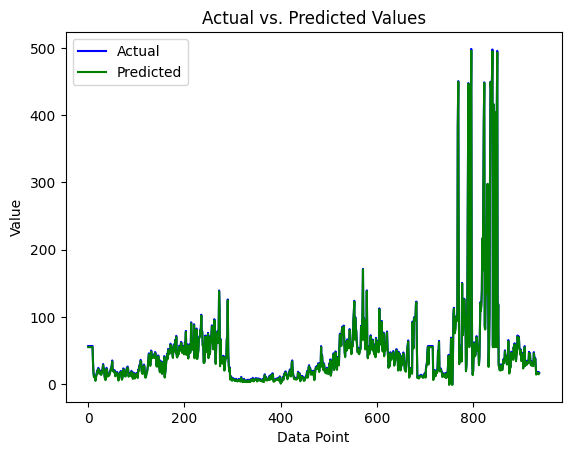

In [15]:
import matplotlib.pyplot as plt



# x-axis values (assuming 0-based indexing)
x_values = range(len(train))

# plot actual values as a blue line
plt.plot(x_values, train, color='blue', label='Actual')

# plot predicted values as a green line
plt.plot(x_values, train_predict, color='green', label='Predicted')

# set plot title and labels
plt.title('Actual vs. Predicted Values')
plt.xlabel('Data Point')
plt.ylabel('Value')

# show legend
plt.legend()

# display plot
plt.show()

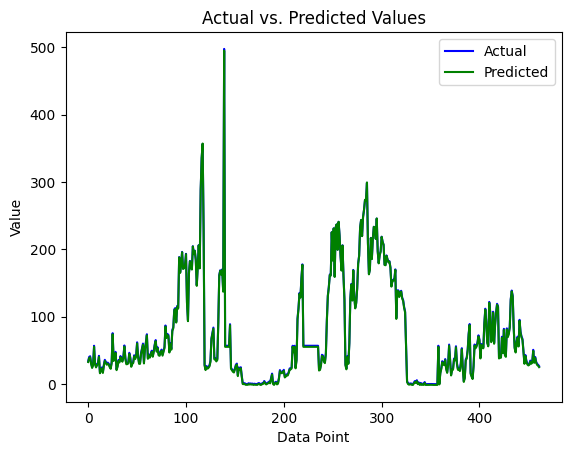

In [16]:
import matplotlib.pyplot as plt



# x-axis values (assuming 0-based indexing)
x_values = range(len(test))

# plot actual values as a blue line
plt.plot(x_values, test, color='blue', label='Actual')

# plot predicted values as a green line
plt.plot(x_values, test_predict, color='green', label='Predicted')

# set plot title and labels
plt.title('Actual vs. Predicted Values')
plt.xlabel('Data Point')
plt.ylabel('Value')

# show legend
plt.legend()

# display plot
plt.show()